## Bivariate normal plot

In [17]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

   ## 1. Parameters for bivariate normal
   building the mean vector and the covariance matrix

In [18]:
#Parameters to set
mu_x  = 0
variance_x = 10

mu_y = 0
variance_y = 5

mu_vect = [mu_x, mu_y]
cov_M = [[variance_x, 0], [0, variance_y]]

## 2. Parameters for 3d surface
meshgrid creates matrices corresponding to x and y. 
In the case of the X matrix, it makes enough copies of x as rows of the matrix to make X a square matrix.
For the Y matrix, it copies y over the columns to create the corresponding Y square matrix.

Now, an interesting piece of code appears:
    
    pos = np.empty(X.shape + (2,))

X.shape returns, as we know, the dimensions of the matrix X. But what about + (2,) in:

    X.shape + (2,)
    
What the addition operator there is concatenation: it's concatenating the tuple that represents the dimensions of X, a square matrix of (200, 200) with another tuple that represents a new dimension: (2,) . The result of X.shape + (2,) is 
    
    (200, 200, 2)
    
The expression comes in handy when declaring the new empty multidimensional matrix that will hold both the X and the Y matrices. Notice that if the expression used was

    X.shape + (2)
    
it would have returned an error, as the Python interpreter sees (2) as the integer 2 and not a tuple. Hence the need to type in (2,) - an integer enclosed in parentheses with a comma after it; Python then understands it's a tuple with one element, rather than just a number). 

In [19]:
#Create grid and multivariate normal
x = np.linspace(-10,10,200)
y = np.linspace(-10,10,200)
X, Y = np.meshgrid(x,y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

len(pos.shape)

3

## 3. Evaluating the multiv normal
reference for the scypy function multivariate_normal 
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html

In [20]:

random_var = multivariate_normal(mu_vect, cov_M)
Z = random_var.pdf(pos)
print(random_var.pdf)
print(Z.shape)

<bound method multivariate_normal_frozen.pdf of <scipy.stats._multivariate.multivariate_normal_frozen object at 0x00000169A3B26630>>
(200, 200)


## 4. Plot

Notice here this line: 

    %matplotlib notebook

it creates an interactive 3d plot on jupyter notebooks. The other interesting part is:

    ax.view_init(20, 0)

The first argument (20) changes the elevation of the plot, which is the angle of rotation with respect to the z axis. The second element, 0, changes the azimuth, or the angle of rotation with respect to the xy plane (thus, around the z axis) 

<IPython.core.display.Javascript object>


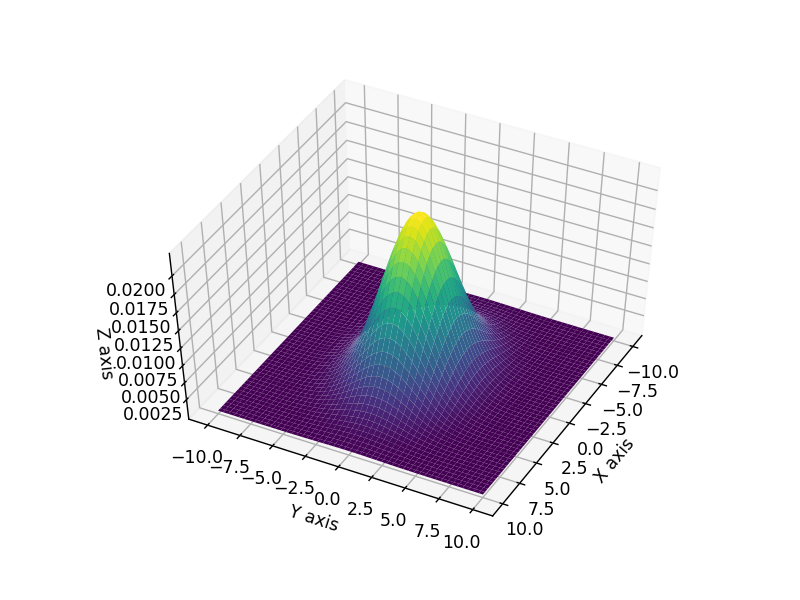

In [22]:
%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.view_init(20, 0)
plt.show()